In [54]:
import pandas as pd
data = pd.read_csv('data.csv')

In [55]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [56]:
total_rows = data.shape[0]
print(f"Total number of rows: {total_rows}")

Total number of rows: 541909


In [57]:
print("Data Types:")
print(data.dtypes)

Data Types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


In [58]:
data['CustomerID'].fillna(data['CustomerID'].mean(), inplace=True)

In [59]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64


In [60]:
data['Description'].fillna('Unknown', inplace=True)

In [61]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [62]:
import pandas as pd

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

current_date = data['InvoiceDate'].max()

recency = current_date - data.groupby('CustomerID')['InvoiceDate'].max()
recency = recency.dt.days  # Extract the number of days

frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()

monetary = data.groupby('CustomerID').agg({'Quantity': 'sum', 'UnitPrice': 'sum'})
monetary['Monetary'] = monetary['Quantity'] * monetary['UnitPrice']

rfm_data = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary['Monetary']
})

print(rfm_data.head())

            Recency  Frequency    Monetary
CustomerID                                
12346.0         325          2        0.00
12347.0           1          7  1182814.18
12348.0          74          4   418360.11
12349.0          18          1   381818.10
12350.0         309          1    12864.10


C:\Users\prabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\prabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

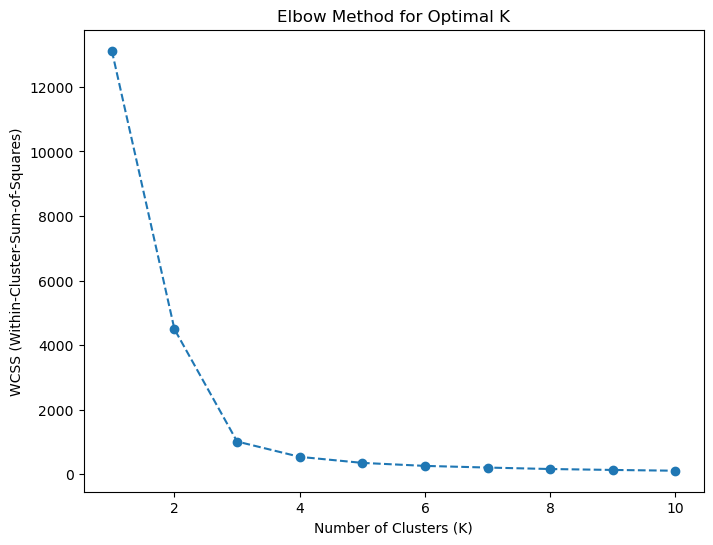

C:\Users\prabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


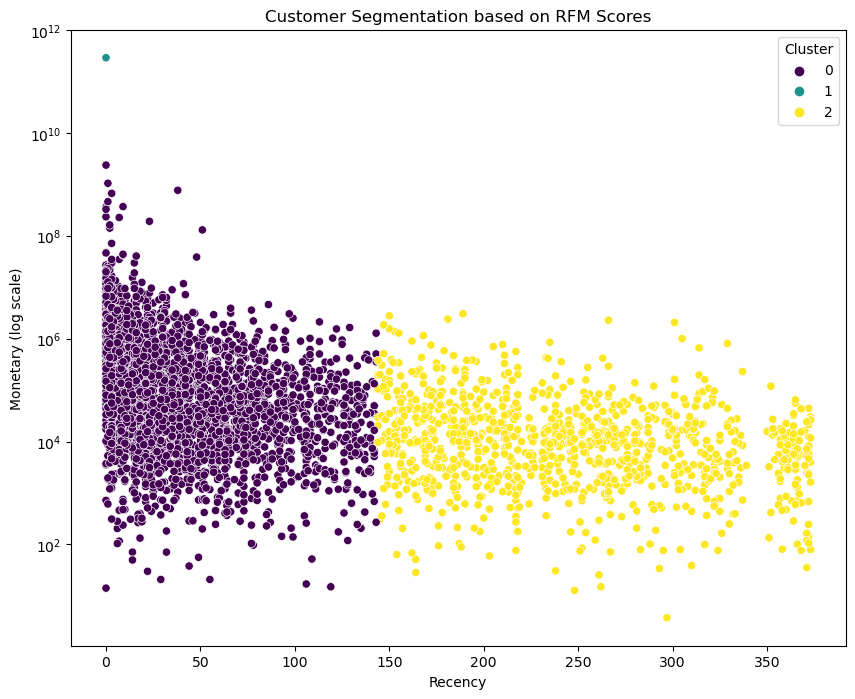

In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

rfm_for_clustering = rfm_data[['Recency', 'Frequency', 'Monetary']]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_for_clustering)

wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.show()

optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm_data, palette='viridis', legend='full')

plt.yscale('log')

plt.title('Customer Segmentation based on RFM Scores')
plt.xlabel('Recency')
plt.ylabel('Monetary (log scale)')
plt.show()

In [64]:
segment_profiles = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
}).reset_index()

segment_profiles['Number of Customers'] = rfm_data['Cluster'].value_counts().sort_index().values

segment_profiles = segment_profiles.rename(columns={
    'Recency': 'Average Recency',
    'Frequency': 'Average Frequency',
    'Monetary': 'Average Monetary',
})

print(segment_profiles)

   Cluster  Average Recency  Average Frequency  Average Monetary  \
0        0        39.544073           6.123708      3.127292e+06   
1        1         0.000000        3710.000000      2.940878e+11   
2        2       247.650647           1.888170      5.499812e+04   

   Number of Customers  
0                 3290  
1                    1  
2                 1082  


Here are actionable marketing recommendations for each segment:

**Segment 0:**

*Characteristics:*
Average Recency: 39.54 days
Average Frequency: 6.12 purchases
Average Monetary: $3,127,292

*Recommendations:*
Launch targeted email campaigns or promotions to encourage repeat purchases within a month.
Offer loyalty programs or discounts for customers making frequent purchases.
Provide personalized product recommendations based on their purchase history.

**Segment 1:**

*Characteristics:*
Average Recency: 0 days (Very recent)
Average Frequency: 3710 purchases (Highly frequent)
Average Monetary: $294,087,800,000 (High spending)

*Recommendations:*
Acknowledge and reward these high-value customers with exclusive perks or loyalty programs.
Implement a personalized VIP service for their exceptional loyalty.
Continuously engage with them through personalized communications and offers.

**Segment 2:**

*Characteristics:*
Average Recency: 247.65 days
Average Frequency: 1.89 purchases
Average Monetary: $54,998

*Recommendations:*
Re-engage dormant customers with targeted reactivation campaigns.
Offer special promotions or discounts to encourage a second purchase.
Implement a win-back strategy to bring back customers who haven't purchased recently.

**General Recommendations:**

*Cross-Sell and Up-Sell:*
Implement cross-selling strategies based on complementary products for all segments.
Encourage higher-value purchases through up-selling techniques.

*Personalized Communication:*
Use personalized communication channels for each segment (e.g., email, SMS, app notifications).
Tailor marketing messages based on individual customer preferences and behaviors.

*Customer Feedback and Surveys:*
Collect feedback to understand customer satisfaction and preferences.
Use surveys to gather insights into potential improvements or new offerings.

*Retention Campaigns:*
Develop customer retention campaigns for each segment to strengthen loyalty.
Monitor customer satisfaction and address concerns promptly.

*Social Media Engagement:*
Leverage social media platforms to engage with customers from different segments.
Run targeted social media campaigns to increase brand awareness and loyalty.

QUESTIONS

**1. Data Overview**

a. What is the size of the dataset in terms of the number of rows and columns?

In [65]:
print(f"Dataset Size: {data.shape}")

Dataset Size: (541909, 8)


b. Can you provide a brief description of each column in the dataset?

In [66]:
print("\nColumn Descriptions:")
print(data.info())

print("\nSummary Statistics for Numerical Columns:")
print(data.describe())


Column Descriptions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

Summary Statistics for Numerical Columns:
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000        

c. What is the time period covered by this dataset?

In [67]:
print("\nTime Period Covered:")
print("Minimum Invoice Date:", data['InvoiceDate'].min())
print("Maximum Invoice Date:", data['InvoiceDate'].max())


Time Period Covered:
Minimum Invoice Date: 2010-12-01 08:26:00
Maximum Invoice Date: 2011-12-09 12:50:00


**2. Customer Analysis**

a. How many unique customers are there in the dataset?

In [68]:
unique_customers = data['CustomerID'].nunique()
print("Number of Unique Customers:", unique_customers)

Number of Unique Customers: 4373


b. What is the distribution of the number of orders per customer?

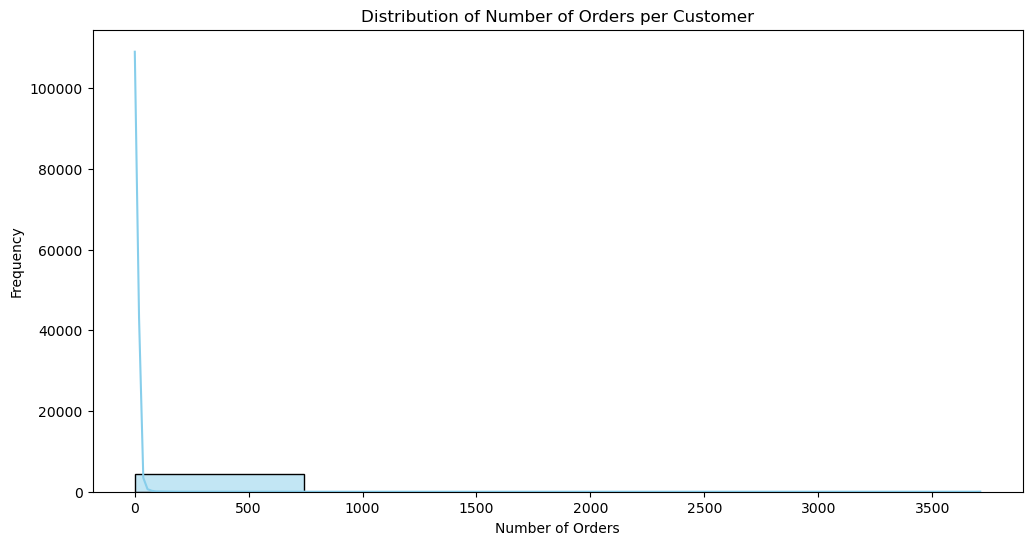

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

orders_per_customer = data.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(12, 6))
sns.histplot(orders_per_customer, bins=5, kde=True, color='skyblue')
plt.title('Distribution of Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

c. Can you identify the top 5 customers who have made the most purchases by order
count?

In [70]:
top_customers_by_order_count = data.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False)

top_5_customers = top_customers_by_order_count.head(5)

print("Top 5 Customers and Order Count:")
print(top_5_customers)

Top 5 Customers and Order Count:
CustomerID
15287.69057    3710
14911.00000     248
12748.00000     224
17841.00000     169
14606.00000     128
Name: InvoiceNo, dtype: int64


**3. Product Analysis**

a. What are the top 10 most frequently purchased products?

In [71]:
top_products_by_frequency = data['StockCode'].value_counts().head(10)

print("Top 10 Most Frequently Purchased Products:")
print(top_products_by_frequency)

Top 10 Most Frequently Purchased Products:
StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
84879     1502
22720     1477
22197     1476
21212     1385
20727     1350
Name: count, dtype: int64


b. What is the average price of products in the dataset?

In [72]:
average_price = data['UnitPrice'].mean()

print("Average Price of Products:", average_price)

Average Price of Products: 4.611113626088513


c. Can you find out which product category generates the highest revenue?

In [73]:
data['Revenue'] = data['Quantity'] * data['UnitPrice']
top_revenue_category = data.groupby('Description')['Revenue'].sum().idxmax()
print("Product Category Generating the Highest Revenue:", top_revenue_category)

Product Category Generating the Highest Revenue: DOTCOM POSTAGE


**4. Time Analysis**

a. Is there a specific day of the week or time of day when most orders are placed?

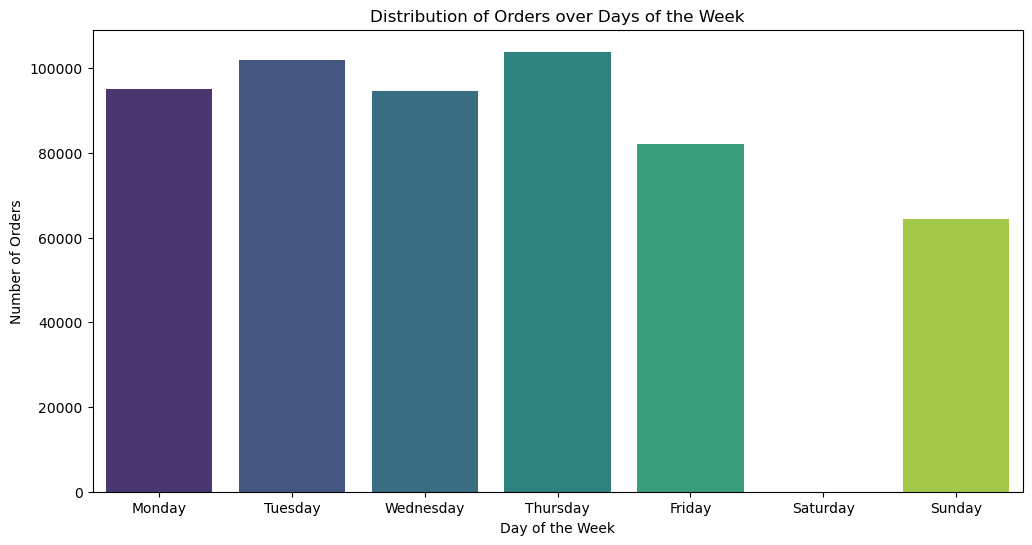

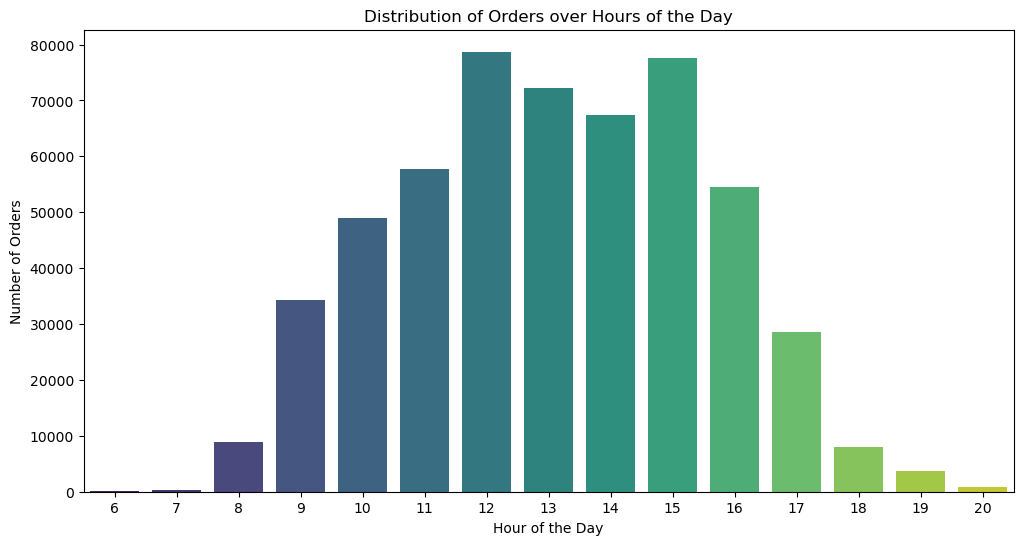

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()
data['HourOfDay'] = data['InvoiceDate'].dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfWeek', data=data, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Orders over Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='HourOfDay', data=data, palette='viridis')
plt.title('Distribution of Orders over Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

There is no specific day on which the most of the orders are placed but, the highest number of orders seem to have been placed on thursdays and around noon time during most days.

b. What is the average order processing time?

In [75]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['OrderProcessingTime'] = data.groupby('InvoiceNo')['InvoiceDate'].transform(lambda x: x.max() - x.min())
average_processing_time = data['OrderProcessingTime'].mean()
print("Average Order Processing Time:", average_processing_time)

Average Order Processing Time: 0 days 00:00:00.370578824


c. Are there any seasonal trends in the dataset?

In [76]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['DayOfWeek'] = data['InvoiceDate'].dt.day_name()

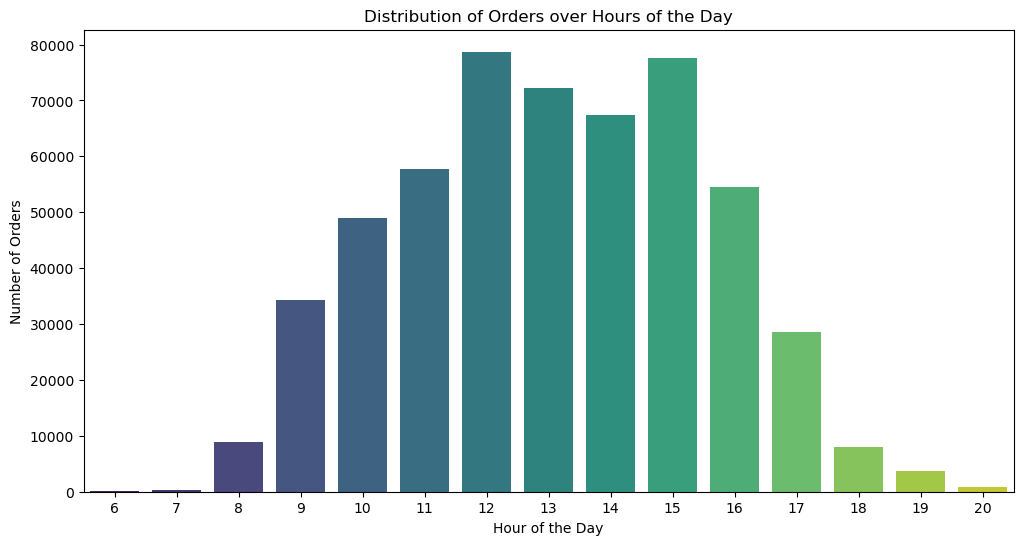

In [77]:
plt.figure(figsize=(12, 6))
sns.countplot(x='HourOfDay', data=data, palette='viridis')
plt.title('Distribution of Orders over Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

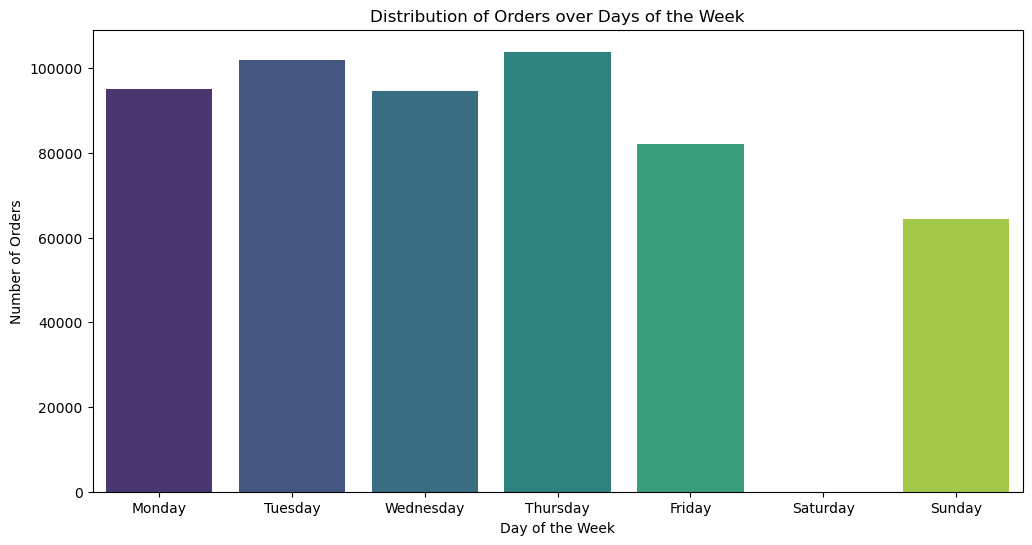

In [78]:
plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfWeek', data=data, palette='viridis', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Orders over Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

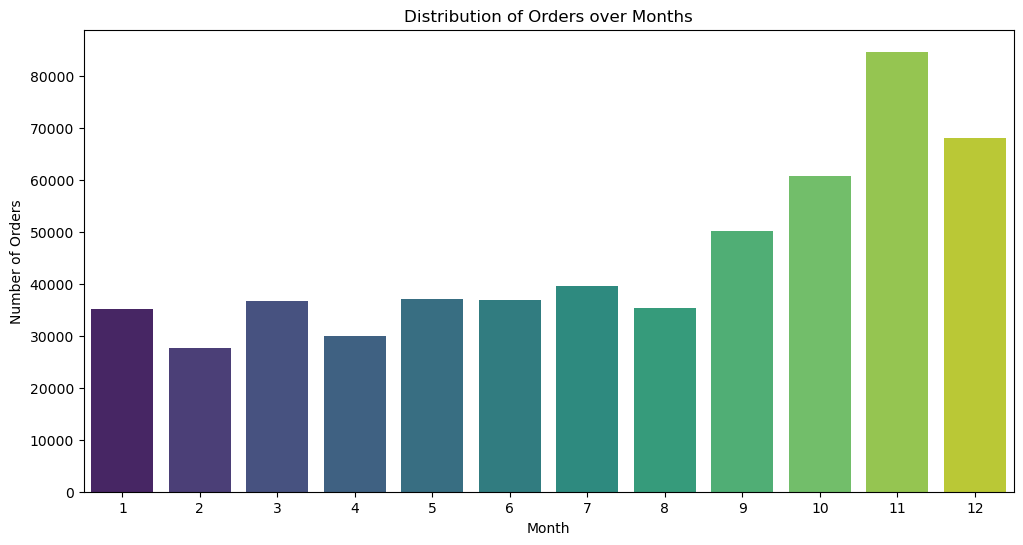

In [79]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=data, palette='viridis')
plt.title('Distribution of Orders over Months')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

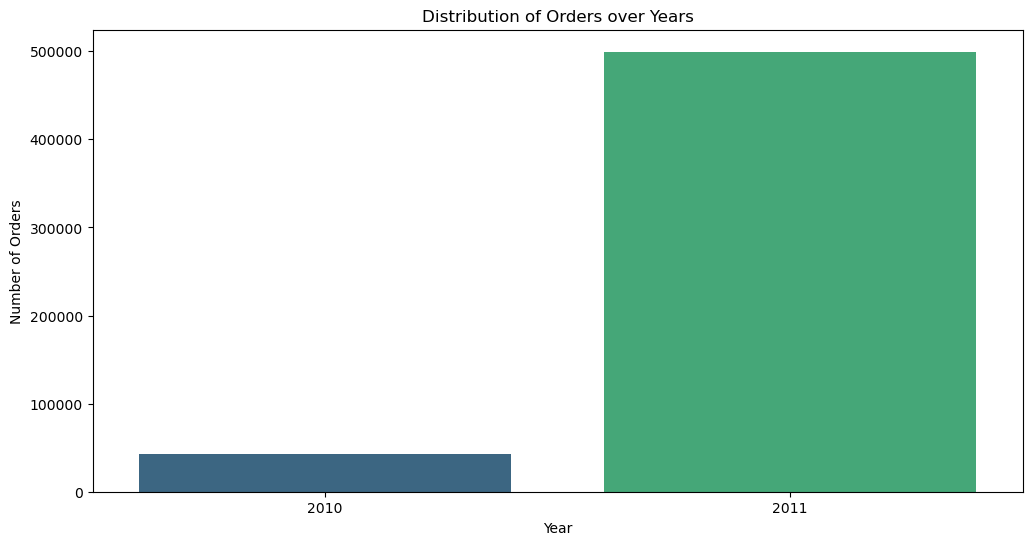

In [80]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=data, palette='viridis')
plt.title('Distribution of Orders over Years')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.show()

We can see that there is a huge rise in the number of orders placed from the year 2010 to 2011.
We can also observe from the plots that the number of orders placed has risen as it nears the end of every year. We can clearly see that the number of orders on saturdays are very less compared to other days. Very less number of orders placed during night times on all days.

**5. Geographical Analysis**

a. Can you determine the top 5 countries with the highest number of orders?

In [81]:
top_countries_by_orders = data['Country'].value_counts().head(5)

print("Top 5 Countries with the Highest Number of Orders:")
print(top_countries_by_orders)

Top 5 Countries with the Highest Number of Orders:
Country
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: count, dtype: int64


b. Is there a correlation between the country of the customer and the average order
value?

In [82]:
print("Average Order Value by Country:")
print(average_order_value_by_country)

import numpy as np

grouped_data = data.groupby('Country')

country_stats = grouped_data.agg({
    'CustomerID': 'nunique', 
    'Revenue': 'mean'
}).rename(columns={'CustomerID': 'Number of Customers', 'Revenue': 'Average Order Value'})

correlation = np.corrcoef(country_stats['Number of Customers'], country_stats['Average Order Value'])[0, 1]
print("Correlation between Number of Customers and Average Order Value:", correlation)

Average Order Value by Country:
Country
Australia               108.877895
Austria                  25.322494
Bahrain                  28.863158
Belgium                  19.773301
Brazil                   35.737500
Canada                   24.280662
Channel Islands          26.499063
Cyprus                   20.813971
Czech Republic           23.590667
Denmark                  48.247147
EIRE                     32.122599
European Community       21.176230
Finland                  32.124806
France                   23.069288
Germany                  23.348943
Greece                   32.263836
Hong Kong                35.128611
Iceland                  23.681319
Israel                   26.625657
Italy                    21.034259
Japan                    98.716816
Lebanon                  37.641778
Lithuania                47.458857
Malta                    19.728110
Netherlands             120.059696
Norway                   32.378877
Poland                   21.152903
Portugal       

**6. Payment Analysis**

a. What are the most common payment methods used by customers?

No data about payment methods

b. Is there a relationship between the payment method and the order amount?

**7. Customer Behavior**

a. How long, on average, do customers remain active (between their first and last
purchase)?

In [83]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
customer_active_duration = data.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])
customer_active_duration['ActiveDuration'] = customer_active_duration['max'] - customer_active_duration['min']
average_active_duration = customer_active_duration['ActiveDuration'].mean()
print("Average Customer Active Duration:", average_active_duration)

Average Customer Active Duration: 133 days 18:44:15.504230506


b. Are there any customer segments based on their purchase behavior?

In [88]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

recency = data.groupby('CustomerID')['InvoiceDate'].max()
frequency = data.groupby('CustomerID')['InvoiceNo'].nunique()
monetary = data.groupby('CustomerID')['Revenue'].sum()

rfm_data = pd.DataFrame({'Recency': recency, 'Frequency': frequency, 'Monetary': monetary})

rfm_data = rfm_data.reset_index()

customer_ids = rfm_data['CustomerID']

rfm_for_clustering = rfm_data[['Recency', 'Frequency', 'Monetary']]

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_for_clustering.iloc[:, 1:])

num_clusters = 4 
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_profiles = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Number of Customers'})

print("Cluster Profiles:")
print(cluster_profiles)

C:\Users\prabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Profiles:
                              Recency    Frequency      Monetary  \
Cluster                                                            
0       2011-09-08 09:30:12.198940928     4.618697  1.419847e+03   
1       2011-12-09 10:26:00.000000000  3710.000000  1.447682e+06   
2       2011-12-06 12:30:20.000000000    64.666667  2.411366e+05   
3       2011-12-03 02:08:46.153846272    74.500000  5.424088e+04   

         Number of Customers  
Cluster                       
0                       4343  
1                          1  
2                          3  
3                         26  


**8. Returns and Refunds**

a. What is the percentage of orders that have experienced returns or refunds?

No data about returns or refunds

b. correlation between the product category and the likelihood of returns?

NA

**9. Profitability Analysis**

a. Can you calculate the total profit generated by the company during the dataset's time period?

In [90]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Revenue'] = data['Quantity'] * data['UnitPrice']
total_profit = data['Revenue'].sum()
print("Total Profit:", total_profit)

Total Profit: 9747747.933999998


In [92]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

data['Revenue'] = data['Quantity'] * data['UnitPrice']
product_profit = data.groupby('Description')['Revenue'].sum()
product_revenue = data.groupby('Description')['Revenue'].sum()

profit_margin = (product_profit / product_revenue) * 100

top_products = profit_margin.nlargest(5)
print("Top 5 Products with Highest Profit Margins:")
print(top_products)

Top 5 Products with Highest Profit Margins:
Description
 4 PURPLE FLOCK DINNER CANDLES    100.0
 50'S CHRISTMAS GIFT BAG LARGE    100.0
 DOLLY GIRL BEAKER                100.0
 I LOVE LONDON MINI BACKPACK      100.0
 I LOVE LONDON MINI RUCKSACK      100.0
Name: Revenue, dtype: float64


**10. Customer Satisfaction**

a. Is there any data available on customer feedback or ratings for products or services?

No, there is no data available on customer feedback or ratings for products or services.

b. Can you analyze the sentiment or feedback trends, if available?

NA

In [94]:
# Assuming 'data' is the DataFrame containing your dataset
negative_unit_prices = data[data['UnitPrice'] < 0]

print("Negative Unit Prices:")
print(negative_unit_prices[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice']])


Negative Unit Prices:
       InvoiceNo StockCode      Description  Quantity  UnitPrice
299983   A563186         B  Adjust bad debt         1  -11062.06
299984   A563187         B  Adjust bad debt         1  -11062.06
